In [12]:
%load_ext autoreload
%autoreload 2

import polars as pl
import markout
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# This test book analyzes USDC-WETH pools from 8/2021 - 9/2022 so that I can compare the results to the 0xfbifemboy analysis.
# see testquery.sql for eth_usdc_pools.csv data
#   5 bps = 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640
#   30 bps = 0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8
#   100 bps = 0x7bea39867e4169dbe237d55c8242a8f2fcdcc387

test_data = markout.loadSwaps(filepath='eth_usdc_pools.csv')

In [28]:
test_data = markout.construct_markout(test_data)

In [29]:
charting = test_data.with_columns(
        cum_markout = pl.col('markout').cum_sum().over('address'),
        pool = pl.when(pl.col('address') == '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640').then(pl.lit('5 bps'))
            .when(pl.col('address') == '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8').then(pl.lit('30 bps'))
            .when(pl.col('address') == '0x7bea39867e4169dbe237d55c8242a8f2fcdcc387').then(pl.lit('100 bps'))
            .otherwise(None)
    )

In [42]:
charting.filter(pl.col('pool') == '30 bps').head(1000).write_csv('eth_usdc_cut.csv')

<Axes: xlabel='block_timestamp', ylabel='cum_markout'>

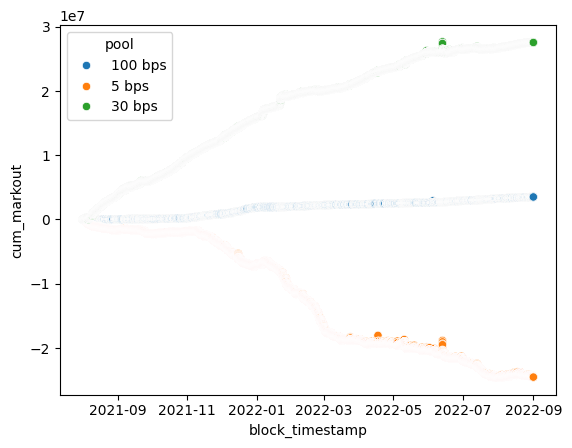

In [38]:
sns.scatterplot(data = charting, x = 'block_timestamp', y = 'cum_markout', hue = 'pool')